# Learn Matplotlib

## The Time Has Come

### I am finally fed up with not just knowing this thing, I use it so much...

Matplotlib is the primary way to output graphs from python code.

Matplotlib is the primary way I make my graphs.

I don't have the foggiest idea how matplotlib works and I always end up re-looking even the most basic parts of it up. This is a huge waste of time and there are probably a lot simpler ways to display everything. So, I'm going to devode some actual intense time to *learning* matplotlib so I can just get the plots done. 

Or at the very least I'll have everything stored in this notebook so I can steal it.

Primary Source for stuff here: the matplotlib documentation, which has tutorials that DO explain these things why have we never used them aaaaaa.

In [55]:
%matplotlib notebook
#notebook may be superior to widget here? Unknown as of now. 

#The magic above is so we can have interactive stuff. 
#Might as well put all graphs in it, it doesn't appear to cause problems.
#It also helpfully tells you what your cursor is pointing at!

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker #for tick marks on axis objects. 
import matplotlib as mpl #Every now and then you have to access matplotlib itself. 
import matplotlib.animation as animation

These lines will almost always be here. Numpy is not our concern--it is the mathematical addon to python, most of the things it does are related to math concepts and are somewhat intuitive. No need to learn that. 

However, the one above is doing something strange. Why do we always only examine the pyplot part of matplotlib? Sus. Regardless, the general way to import it is "plt" becuase we'll be calling it a loooooooooot. 

<IPython.core.display.Javascript object>


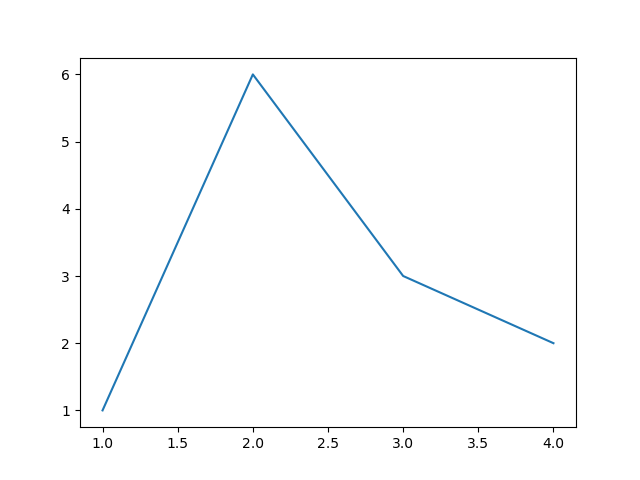

In [4]:
# Data is graphed on figure objects, which contain axes. We can set them up like so:

fig, ax = plt.subplots()

# And then just plot something on them.

ax.plot([1,2,3,4],[1,6,3,2])

# Plots don't display unless you ask them to in many environments. But Jupyter will genreate it! 

plt.show()

The figure object is the *whole* figure. But unless you have lots of plots, basically everything you look at is going to be an axis adjustment, only global things would be the fig adjustment. (In the Anatomy of a Figure diagram, everything is ax.something except for the axes thesmevels, which is fig.subplots, and then fig is part of plt.figure. Basically deal with the ax, don't think of them as literal axes, but rather the interface in which you are working. 

Basically when using "fig,ax" we are explicitly telling matplotlib what's up, while if we remain in "plt" we are doing it all implicitly. 

Also of note, technically all these objects are subobjects of ARTIST. Artist is just... things that need to be drawn. It appears as though that the "canvas" is not acutally the "figure", the canvas is what you see, the figure is what the computer holds in memory. Most artists will be affixed to an Axes. (Not confusing at all, nope...)

Note that most of the time we want to submit a numpy array to matplotlib. While it can take other things they may occasionally not work properly. 

There is an interesting functionality that can be used to plot the same sort of thing, just with different data. Interesting. Let's try it out.

<IPython.core.display.Javascript object>


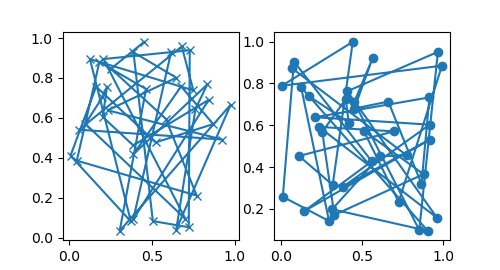

In [5]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1,data2,**param_dict)
    return out

# Note that it's not just two sets of data, but also a dictionary of parameters. 
# This will remove some of the neat functionality of implicit parameters, as you have to pass it
# as a dictionary.

data1, data2, data3, data4 = np.random.rand(4, 40)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})



Anyway unless we're making a lot of plots that can easily have things be passed to them (hmm would probably help the Objects stuff) that won't be useful. Instead let's talk about adjusting the artists. Most often we set the parameters by adding `color="orange"` after the data argument in `plot()`, but we can also call direct methods on the artists. 

<IPython.core.display.Javascript object>


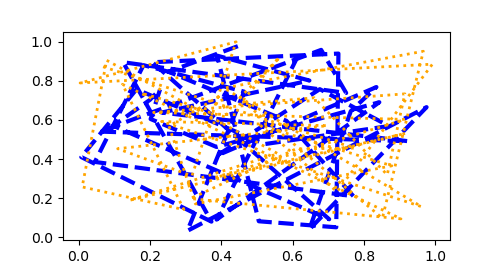

In [6]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, data2, color='blue', linewidth=3, linestyle='--')
l, = ax.plot(data3, data4, color='orange', linewidth=2)
l.set_linestyle(':')

Really at this point so long as we are just plotting data, all we need to note is the `subplots()` function and the `plot()` function. Everything else can just be passed as arguments, and that seems to be the better way to do it. There are other options, of course, such as `ax.scatter` which just posts dots everywhere. Wheee!

Oh hey matplotlib accepts TeX equations. Neat and useful!

Anyway, the quickstart had a ton of things covered briefely, but I want to cover things in more detail to truly understand it all. 



## THE FIGURE



The figure is the highest level object we are working with, the window that holds the everything. 

To generate a figure without axes, just use `fig = plt.figure(...)`. May be useful for nested figures. 

The code below demonstrates some of the high-level stuff that fig can do.

<IPython.core.display.Javascript object>


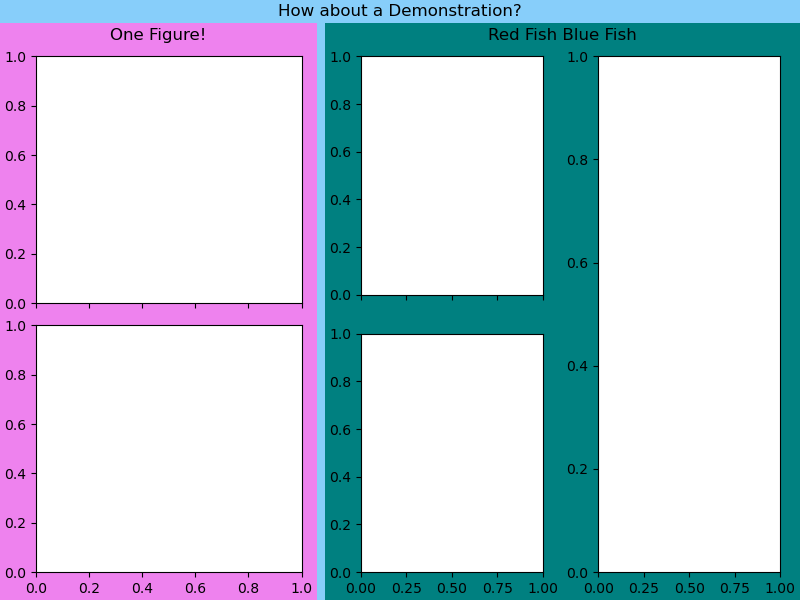

In [7]:
#normally we would set fig and ax here, but we want to demonstrate subfigs so 'subplots()' is not our friend. 
#we will use it in the subfigs though.

#Initialization of highest order figure
fig = plt.figure(figsize=(8,6), facecolor='lightskyblue',layout='constrained')
#figsize: size in inches of whole figure.
#facecolor: color of fig background.
#layout: layout style. (What options can go here?)

fig.suptitle('How about a Demonstration?') #Title addition. I wonder if this can be declared in initialization...

figL, figR = fig.subfigures(1,2,width_ratios=[1,1.5]) #Create two figures. 1 row, 2 columns.
#the width of the second column is 1.5 the first. 

figL.set_facecolor('violet')
figR.set_facecolor('teal') 
figL.suptitle('One Figure!')
figR.suptitle('Red Fish Blue Fish')

axL = figL.subplots(2,1,sharex=True) #Create axes with generic subplots.
axR = figR.subplot_mosaic([['A','Right'],['B','Right']],sharex=True) #Demonstration of the mosaic.
#mosaic will have areas be part of the same axes if the name is the same for both of them in initialization.
#for the record `add_axes` is the manual way of doing this. 

#The next line saves a pdf image. Commented out by default.
#plt.savefig("myImagePDF.pdf", format="pdf")
#This should work for basically all figures. There may be other options needed to set for odd things.
#Naturally animations work differently. 

plt.show() #Show!

At this point this is just setting up where things can be and background stuff, naturally there will be more. Eventually. For now, this is just the initialization. 

Up next: interactivity! In specifics, what each of the buttons do in our little "magic" window. 

Home: create original plot.

Arrows: navigate back and forward through plot updates.

Move: move the viewing area for plots, as well as zooming. 

Zoom square: zoom into a rectangle selection.

Save: save as png. We want pdf so don't use this. 

But wait, I hear you shout, aren't there other kinds of interactivity? Absolutely! But we aren't concerned about those, and even a cursory inspection indicats they are a *mess*. So let's just note that the interactivity options exist, but we won't be concerned with them. 

## THE AXES

It's best to think of axes not as a bunch of axis objects strung together (even if sometimes that is the case), but rather a window on which things can be plotted. In our above figure demonstration, we have five separate axes. Let's see if we can use these to demonstrate the kinds of things axes can do. 

<IPython.core.display.Javascript object>


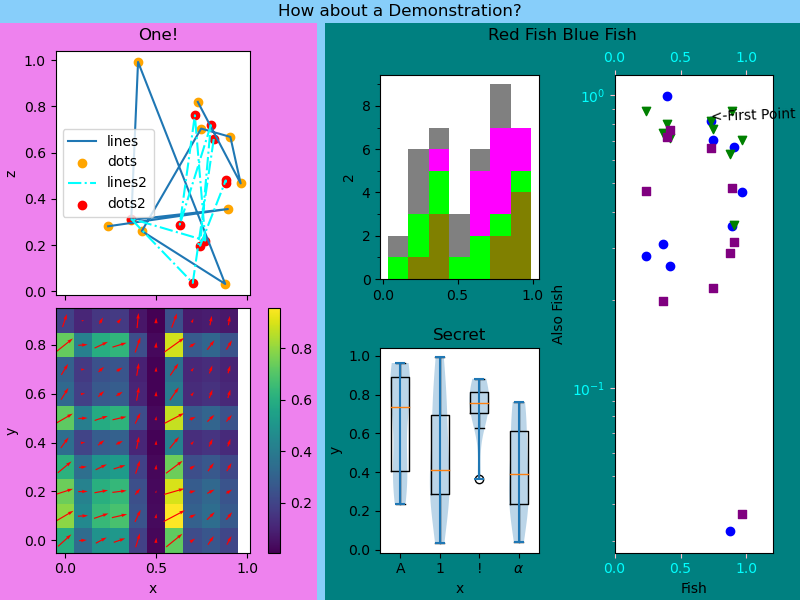

In [8]:
#Figure Stuff, see previous implementaiton for comments and details.
fig = plt.figure(figsize=(8,6), facecolor='lightskyblue',layout='constrained')
fig.suptitle('How about a Demonstration?') 
figL, figR = fig.subfigures(1,2,width_ratios=[1,1.5])
figL.set_facecolor('violet')
figR.set_facecolor('teal') 
figL.suptitle('One!')
figR.suptitle('Red Fish Blue Fish')
axL = figL.subplots(2,1,sharex=True) 
axR = figR.subplot_mosaic([['A','Right'],['B','Right']]) 

#Random Data Generation for our liberal use. 
ticks = np.arange(10)/10.0 #for when we just need values for a normal axis. 
data1, data2, data3, data4 = np.random.rand(4, 10)  # make 4 random data sets for use in whatever we wish. 

#Axes stuff:
axL[1].set_ylabel("y") #"subplots" are accessed via number, matrix if necessary (which it is not here)
axL[0].set_ylabel("z")
axL[1].set_xlabel("x")
axR["B"].set_ylabel("y") #"mosaic" axes are accessed via dictionary label. 
axR["B"].set_xlabel("x")
axR["A"].set_ylabel("2")
axR["Right"].set_ylabel("Also Fish")
axR["Right"].set_xlabel("Fish")
axR["B"].set_title("Secret") #Other axes would also work this way. Only one title to avoid clutter.

#PAIRWISE DATA
axL[0].plot(data1,data2,label="lines") #basic plotting just creates a line with two variables. 
axL[0].scatter(data1,data2,color="orange",label="dots") #Draws dots at points, doesn't connect them normally. 
axL[0].plot(data3,data4,label="lines2", color="cyan", linestyle="-.") #basic plotting just creates a line with two variables. 
axL[0].scatter(data3,data4,color="red",label="dots2") #Draws dots at points, doesn't connect them normally. 
#Other x vs y plots: bar (category and height) and step (lines are drawn as steps instead of direct)
axL[0].legend() #activates the legend, which depends on labels.

#ARRAY DATA
#important here is that you need two axis values, but also a 2D array for the field values.
save = axL[1].pcolormesh(ticks,ticks,np.outer(data1,data2)) #Layout is similar for contour plotting.
fig.colorbar(save, ax=axL[1]) #add the color bar; "save" only needed so we can do this.
axL[1].quiver(ticks, ticks, np.outer(data1,data2), np.outer(data3,data4), color="red",pivot="mid")
#streamplot can also do vectors like quiver, but in a magnetic field lines sort of way. Far less intuitive. 
#imshow is all about displaying an image. But with data we can kind of do that with pcolormesh.

#STATISTICAL DISTRIBUTIONS
axR["A"].hist([data1,data2,data3,data4],7,color=["olive","lime","magenta","gray"],stacked=True) #single data value into bins. 
axR["A"].yaxis.set_minor_locator(ticker.MultipleLocator(1.))
#hist2d is also available. We can also do pie (charts)
axR["B"].boxplot([data1,data2,data3,data4])
axR["B"].violinplot([data1,data2,data3,data4])
axR["B"].set_xticks([1,2,3,4],labels=["A","1","!",r"$\alpha$"]) #Manual axis addition.
#boxplot and violinplot above, for data distributions. 

#Errorbar is also an important plotting regime. We'll do it in another code block.

#Bonus: axis alteration
axR["Right"].set_yscale('log') #This is how you get something to log scale. 
axR["Right"].set_xlim([0,1.2]) #Artificially set the range of values. 
#Adjusting tick parameters is allowed though usually unecessary. `set_xticks` and `minorticks_on` are relevant.
axR["Right"].tick_params(top=True, labeltop=True, color='pink', labelcolor='cyan',which='both')
#"which" here emphasizes that we do both major AND minor ticks.
axR["Right"].scatter(data1,data2,color="blue")
axR["Right"].scatter(data1,data3,color="green",marker="v")
axR["Right"].scatter(data1,data4,color="purple",marker="s")
axR["Right"].text(data1[0],data2[0],"<-First Point", rotation=2)

#Tricontour is also available if we have a "triangle grid" for contours. Tricolor is also avialable. 
#These are probably "only use if needed" ones. 

#The aspect ratio can also be changed with .set_aspect(), forcing relative size. We don't bother here. 

plt.show() #Show!

In the mad "plot of everything" above, we did leave off some stuff: error bars, contours, and pie charts. Contours just don't work well with random data, so that's why it isn't up there, error bars were complciated, and pie charts couldn't really... combine, with stuff. Pie charts are pretty self explanatory, and contours follow a similar plotting to the pcolormesh. 

However, we do have a desire to demonstrate the error bars, even if our "errors" aren't gonna be anything more than random numbers slapped everywhere.

<IPython.core.display.Javascript object>


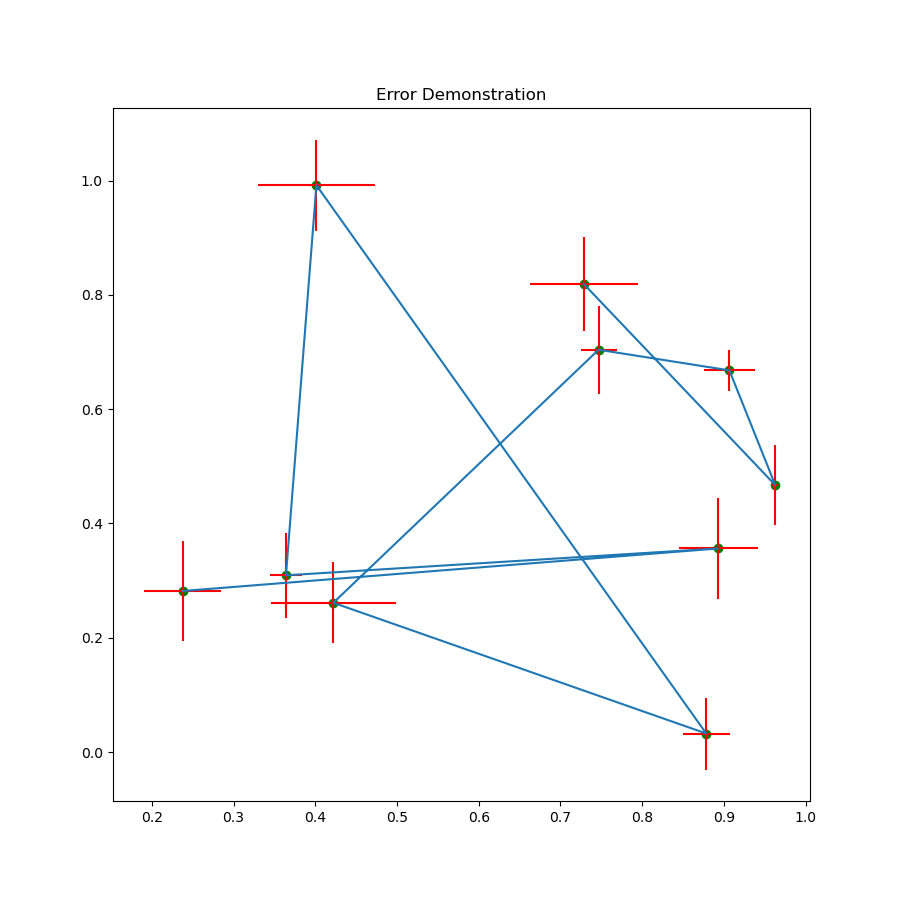

In [9]:
fig, ax = plt.subplots(figsize = (9,9))

ax.set_title("Error Demonstration")

ax.scatter(data1,data2,color="green")
ax.errorbar(data1,data2,data3/10.0,data4/10.0,ecolor="red")

plt.show()

Now these tools will serve us well for most applications, but sometimes we need to use a lotta grids to do a lotta different things. Consider the following as a scaffold from that. (It was the example at the bottom of the arranging multiple axes page, and it also provides a nice squiggle function for use later. I may use it as a "proof" project of knowing everything, as well as simply itching my curiosity about these mysterious shapes. 

<IPython.core.display.Javascript object>


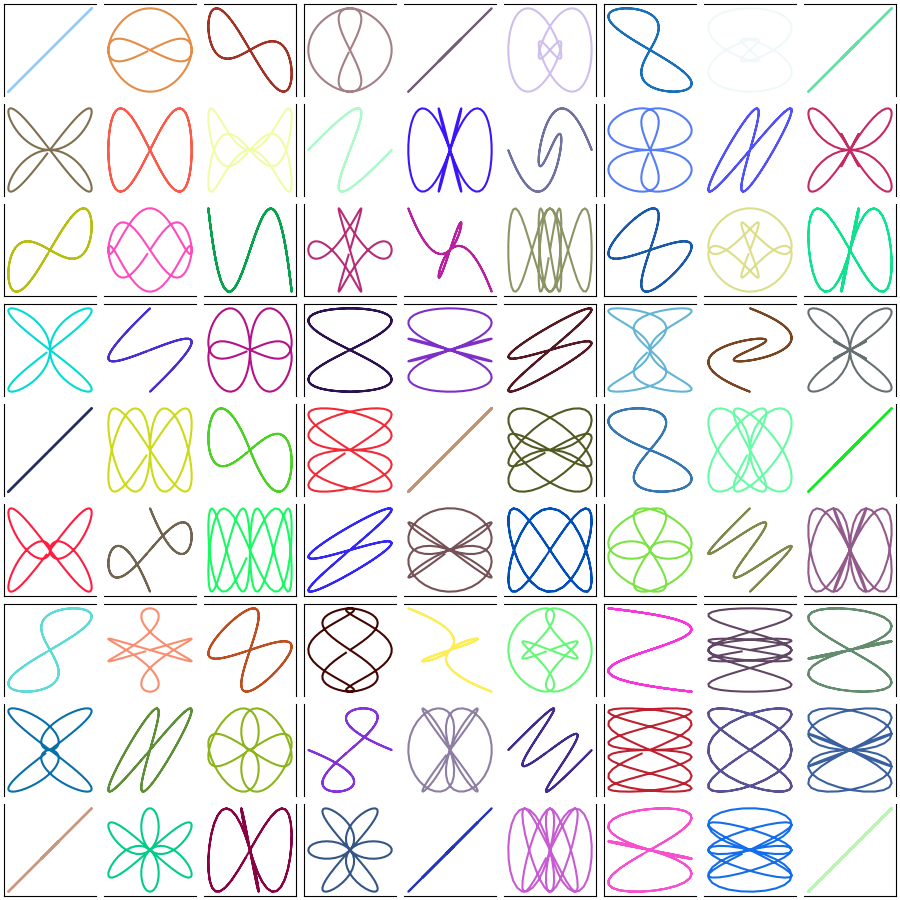

In [10]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)
#This is just the function provided to make squiggles. 

fig = plt.figure(figsize=(9, 9), layout='constrained')
outer_grid = fig.add_gridspec(3, 3, wspace=0, hspace=0) #The outer grid is 4x4. Reduced to 3x3 for speed.

for a in range(3):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1),c=np.random.rand(3,))
            ax.set(xticks=[], yticks=[]) #Remove ticks.

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())
    #For memory: setting the value to 0 makes it always vanish, and 1 makes it always on.

plt.show()

I think an animator with specific controls might be helpful in noting this shape's behavior... but that will be for another time, there's other stuff to learn.

## Various notes

Note on colorbars: usually having them automatically attach to an axes is what you want so nothing else needs to be done. However, when colorbars are being annoying, there are actually lots of ways to get them to place properly. I classify most of it as finagling though which is unecessary... at the moment. There is a way to get graphs to share a colorbar that straddles them as well. Additional note: yes you can do colormaps in log form, you just have to specify the norm to be the LogNorm. There are naturally other options as well-linear in the center, two different kinds of plotting, etc. 

Wait hold on YOU CAN DECLARE THEM WITHOUT A PLOT!? This will be investigated below.

Note on scales: usually you only need to use linear or log on any given axis. The log can be adjusted to whatever base needed with another argument `ax.set_yscale('log',base=2)`. There's also the symlog plot which has a `linthresh` portion that tells it when to go to linear plotting so we don't try to take a log of a zero. 

Note on ticks: ticks can be set automatically (prefered) manually (possible for known graph results) or dynamically. The last one is the most curious. We actually have some dynamic minor-ticks in the big multiplot example above, but what it doesn't have is the dynamic *naming* that goes with it. The funky thing is that there are lots of different Formatters to make this thing work out, naming things with minus signs, with symbols, or with units on them. I find this unlikely to be necessary but want to record the option. Also tick parameters can be used for more than just coloring it, you can turn your ticks into gridlines if you want by making them `direction="in"`.

Note on categories: you can plot things correlated to a list of strings. Just be careful as this goes into "category mode". Usually should just work. Doesn't always. 

Note on legends: label your things, it should work. Sometimes you may want to put something on the legend that isn't plotted, fine: just create an artist that isn't drawn. This varies based on what you want in the legend and will require some "finagling". Similarly to colorbars you have a lot of location control should you desire it. Inside OR outside the plot itself! If you want multiple legends for whatever reason you have to manually add one of them as its own artist. 

Note on artists: every object is an aritst here, even the figure itself. Think of it as "something that needs drawn." Usually you don't mess with an artist as an artist directly, however every time you plot or create something you can assign it to some variable, that variable now contains the artist and the artist can be changed or analyzed for whatever purpose you might want. We actually already used this as the "save" variable for getting the colorbar to work. Had to point the bar to the right artist!

Note on paths: you should never have to use paths just plot your equation as an equation. If we were doing something interactive, maybe. That said some of the finer graphics control, like outlining and shadow, can be found here. Of cousre there appear to be alternate ways to do this as well, such as with transformations, another thing we'll probably never need to use. 

Note on style: with the command `plt.style.use("style")` you have the power to use any of the built in styles. The one probably needed most is "dark_background" followed by "graysvcale" but there are quite a few. 

Note on layering: if you need to bother with layers, "zorder" is the parameter you want to mess with. 

Note on boxes: if you ever need to just *draw* there are boxes with various borders on offer, including arrows and toothed edges. Could probably combine this with arrows/annotations to do a flowchart, but we have other options for that. 

### Standalone Colorbars? 



<IPython.core.display.Javascript object>


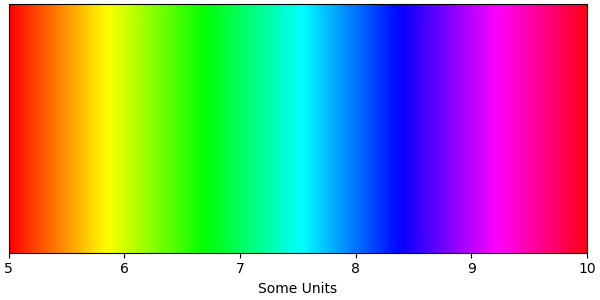

In [11]:
fig, ax = plt.subplots(figsize = (6,3), layout="constrained")

cmap = mpl.cm.hsv
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation="horizontal", label="Some Units")
#Huh, so guess you can do that..

### Textual Tweaks

What sorts of things can be done with text...? We shall see...!

Okay so annoyingly the only *unusual* thing here is an annotation, everything else has been done before or uses an unecessary box.

<IPython.core.display.Javascript object>


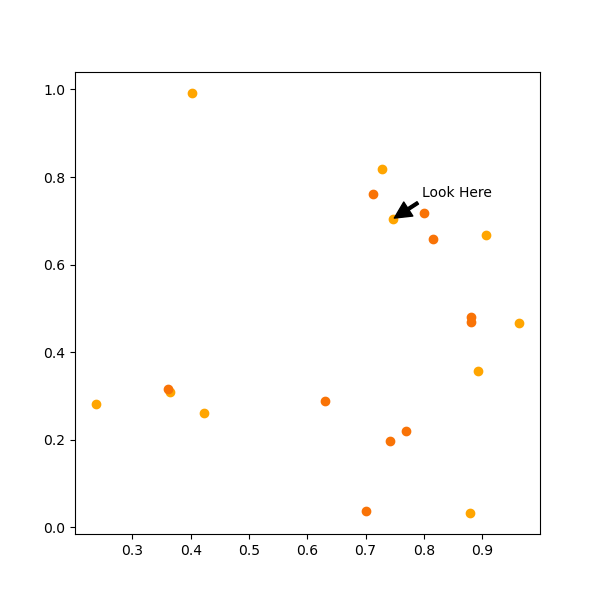

In [12]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(data1,data2,color="orange")
ax.scatter(data3,data4,color="xkcd:orange")

ax.annotate("Look Here",xy=(data1[3],data2[3]), xytext=(data1[3]+.05, data2[3]+.05), arrowprops=dict(facecolor="black", shrink=0.05,width = 2))

plt.show()

## ANIMATION!

This will be the ultimate task and completion thingy. Let's make an animating way to explore the curves that shows all we know is done! Kukukuku.

Anyway yes goal: make an animation that "explores" the phase space of squiggly curves.



[0.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


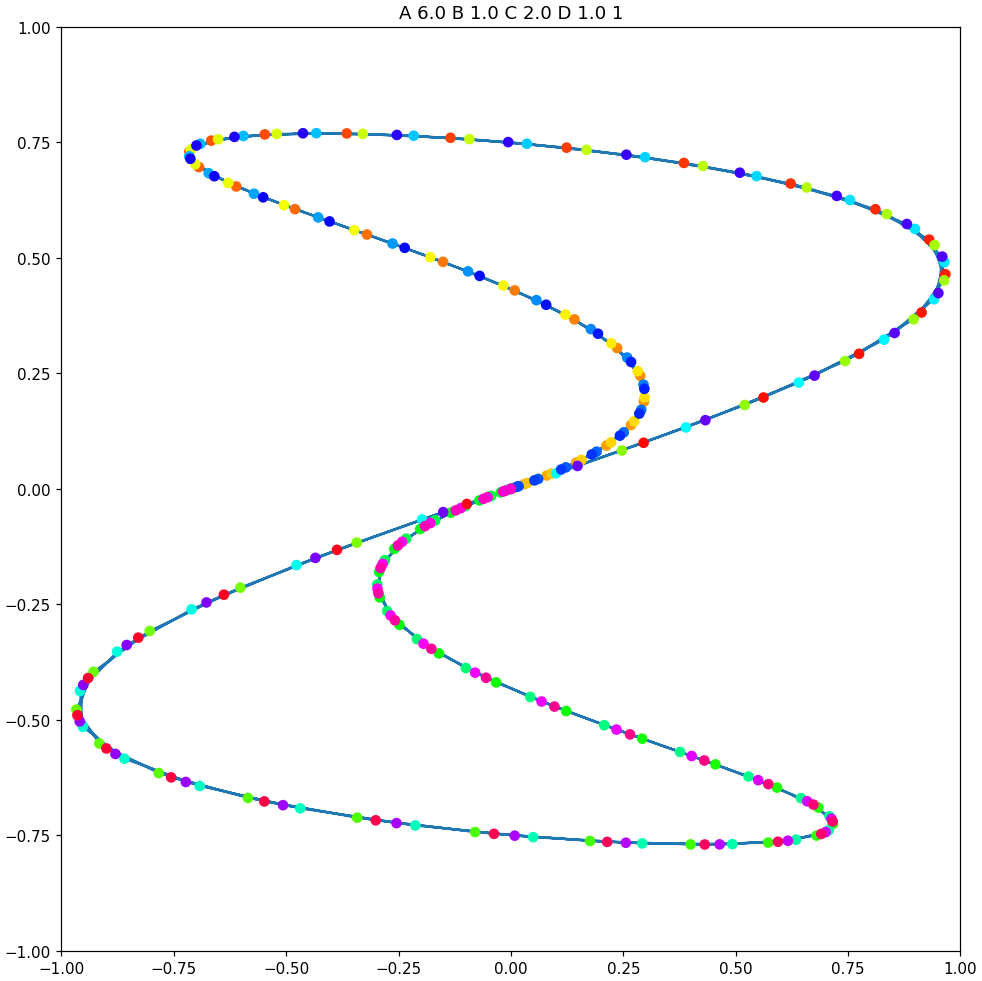

In [168]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 4*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)
#This is just the function provided to make squiggles. 

parameters = [1.,1.,1.,1.] #paremeters for the squiggle
oldParams = [1.,1.,1.,1.] #need this for the animation later, data has to be stored of the prior state. 
differences = [0.,0.,0.,0.]
oldParams[0] = differences[0]
print(oldParams)

fig, ax = plt.subplots(figsize=(9, 9), layout='constrained')

cmap = plt.get_cmap('hsv')
listy = np.arange(len(squiggle_xy(1, 1, 1, 1)[1]))
listy = listy/125.0
#norm = plt.Normalize(0,len(listy))
#couldn't get the norm to work for the line, instead did a mix of scatter and plot.

plotter = ax.plot(*squiggle_xy(1, 1, 1, 1),zorder=1)
scatterer = ax.scatter(*squiggle_xy(1, 1, 1, 1),c=listy,cmap=cmap)
#have to save the plots so we can alter the artists in the animation.

#tell the computer how to update frames.
def update(frame):
    ax.clear()

    order = max(parameters)
    
    if (frame == 0): #When I get this working, something's still not right in how the numbers count.
        if (order == parameters[0] and order == parameters[1] 
            and order == parameters[2] and order == parameters[3]):
            parameters[0] = 1.
            parameters[1] = 1.
            parameters[2] = 1.
            parameters[3] = order+1.
        elif (order == parameters[3]):
            parameters[3] = 1.
            if (max(parameters) < order):
                parameters[2] = order
            elif (parameters[2] == order): 
                parameters[2] = 1.
                if (max(parameters) < order):
                    parameters[1] = order
                elif (parameters[1] == order): 
                    parameters[1] = 1.
                    if (max(parameters) < order):
                        parameters[0] = order
                    else:
                        parameters[0] = parameters[1]+1.
                else:
                    parameters[1] = parameters[1]+1.
            else:
                parameters[2] = parameters[2]+1.
        else:
            parameters[3] = parameters[3]+1.
                     
    plotter = ax.plot(*squiggle_xy(parameters[0], parameters[1], parameters[2], parameters[3]),zorder=1)
    scatterer = ax.scatter(*squiggle_xy(parameters[0], parameters[1], parameters[2], parameters[3]),c=listy,cmap=cmap)
    ax.set(xlim=[-1,1], ylim=[-1,1],
        title = "A "+ str(round(parameters[0],2)) + " B " + str(round(parameters[1],2)) + " C " +str(round(parameters[2],2)) +  " D " + str(round(parameters[3],2)) + " " + str(frame))
        
ani = animation.FuncAnimation(fig, update, frames=10, interval=40)
    
plt.show()

In [ ]:
differences = [parameters[0]-oldParams[0],parameters[1]-oldParams[1],parameters[2]-oldParams[2],parameters[3]-oldParams[3]]
    
    plotter = ax.plot(*squiggle_xy(oldParams[0]+differences[0]*(frame/99.), oldParams[1]+differences[1]*(frame/99.), 
                                   oldParams[2]+differences[2]*(frame/99.), oldParams[3]+differences[3]*(frame/99.)),
                      zorder=1)
    scatterer = ax.scatter(*squiggle_xy(oldParams[0]+differences[0]*(frame/99.), oldParams[1]+differences[1]*(frame/99.), 
                                        oldParams[2]+differences[2]*(frame/99.), oldParams[3]+differences[3]*(frame/99.)),
                           c=listy,cmap=cmap)
    ax.set(xlim=[-1,1], ylim=[-1,1],
        title = "A "+ str(round(oldParams[0],2)) + " B " + str(round(oldParams[1],2)) + " C " +str(round(oldParams[2],2)) +  " D " + str(round(oldParams[3],2)))
